# CS210 - Homework #1: Spotify Playlist Analysis


Exploratory Data Analysis is a fundamental process in the field of data science that helps us gain insights into a dataset by summarizing its main characteristics and identifying patterns and relationships within the data. In this assignment, we will be applying exploratory data analysis techniques to a Spotify playlist to better understand the characteristics of the songs in the playlist. Through this exercise, we will learn scraping, visualize distributions, and uncover insights that can help us make informed decisions about the playlist's content and structure. Whether you are a music lover, aspiring data scientist, or simply interested in exploring the power of data, this assignment will provide you with a hands-on experience in exploratory data analysis that you can apply to any dataset. **You have unlimited freedom to use ChatGPT for this assignment, and we recommend it. Please do not forget to save your ChatGPT chats. Do not use different chats, and do not delete your chat history after you complete the assignment. Besides your notebook, you must also submit for your ChatGPT chat links.**


**In this homework, we offer you 2 ways to get data.**

1 - In this assignment, you will analyze a playlist, and this playlist is available as a table on a website. You can scrape the table from this website, we provide HTML content for this. There is a possibility to retrieve the data using BeautifulSoup. You can also get the table directly from the URL using Selenium, and this way will probably be easier. The homework will start with this part and if you successfully capture the data and use it in the homework, you will start with 25 points.

2 - If you do not want to deal with scraping, we will also provide you with the CSV version of the dataset, and you can use it directly. In this case, naturally you will not have completed the scraping part, but you will still be able to complete the remaining parts of the assignment, and you will not receive any points for the scraping part.




Below, you can find all the set of features, provided in the dataset:

1. **Song:** The name of the track.
2. **Artist:** The name of the artist or group that performed the song.
3. **Popularity:** A numerical measure of the song's popularity.
4. **BPM (Beats Per Minute):** The tempo or speed of the song in beats per minute.
5. **Genres:** The musical genres associated with the song.
6. **Parent Genres:** The broader or parent musical genres of the song.
7. **Album:** The name of the album containing the song.
8. **Album Date:** The release date of the album.
9. **Time:** The duration of the song in minutes and seconds.
10. **Dance:** A numerical value indicating danceability.
11. **Energy:** A numerical value representing the energy level of the song.
12. **Acoustic:** A numerical value indicating the acousticness of the song.
13. **Instrumental:** A numerical value indicating the instrumentalness of the song.
14. **Happy:** A numerical value representing the mood or happiness of the song.
15. **Speech:** A numerical value indicating the presence of speech or lyrics in the song.
16. **Live:** Indicates if the song is a live recording (1 for live, 0 for studio).
17. **Loud:** A numerical value indicating the loudness of the song.
18. **Key:** The musical key in which the song is composed.
19. **Time Signature:** The time signature of the song.
20. **Added At:** The date or timestamp when the song was added to the dataset.
21. **Spotify Track Id:** Unique identifiers assigned to each track by Spotify.
22. **Album Label:** The name of the record label associated with the album.
23. **Camelot:** Information about the musical key or tonal center of the song.
24. **Spotify Track Img:** URLs or references to images associated with the Spotify tracks.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bs4
import requests

## Q1: Scraping  (25 points)

If you want to scrape the playlist, you can retrieve the data using [this playlist analyzer website](https://www.chosic.com/spotify-playlist-analyzer/?plid=4wyQnWDDys6T8A2ni96VfG). Here, you should take the Playlist Table, which contains the songs' information, and convert it to DataFrame. As we mentioned at the beginning of the assignment, using Selenium may be a more logical solution since the content of the site is dynamic. But you are also free to use BeautifulSoup, or read the file directly and start data analysis. If you want to use BeautifulSoup, we provided the static version of the webpage. 

In [2]:
#SCRAPING WAY - 25 POINTS

# Import necessary libraries
from bs4 import BeautifulSoup
import pandas as pd

# Read the HTML content from the local file
with open('/Users/berkeayyildizli/Desktop/CS210 - Homework 1 - for BeautifulSoup.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# If using class name instead of ID:
table = soup.find('table', class_='info-table')

# Check if the table is found
if table:
    # Extract the table data into a list of lists
    data = []
    for row in table.find_all('tr'):  # Include header row
        cols = row.find_all(['td', 'th'])
        cols = [col.text.strip() for col in cols]
        data.append(cols)

    # Create a DataFrame from the list of lists
    columns = data[0]  # Use the first row as headers
    df = pd.DataFrame(data[1:], columns=columns)

    # Display the entire DataFrame
    pd.set_option('display.max_columns', None)  # Display all columns
    display(df)
else:
    print("Table not found. Check the identifier or try a different approach.")


,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,Dance,Energy,Acoustic,Instrumental,Happy,Speech,Live,Loud,Key,Time Signature,Added at,Spotify Track Id,Album Label,Camelot
0,1,Crying Lightning,Arctic Monkeys,75,107,"garage rock, modern rock, permanent wave, rock...",Rock,Humbug,2009-08-20,03:44,50,89,1,0,67,0,20,-4 db,E Minor,4,2023-10-11,6wVWJl64yoTzU27EI8ep20,Domino Recording Co,9A
1,2,Buzzcut Season,Lorde,73,111,"art pop, metropopolis, nz pop, pop","Pop, Electronic",Pure Heroine,2013-09-27,04:06,73,62,61,31,25,0,10,-11 db,C♯/D♭ Major,4,2023-10-11,51QEyJI5M7uyd8DOh9tqQY,Universal Music New Zealand Limited,3B
2,3,Ode To The Mets,The Strokes,69,92,"alternative rock, garage rock, modern rock, pe...",Rock,The New Abnormal,2020-04-10,05:51,43,62,34,18,20,0,10,-5 db,C♯/D♭ Minor,4,2023-10-11,1BLOVHYYlH4JUHQGcpt75R,Cult Records/RCA Records,12A
3,4,Instant Crush (feat. Julian Casablancas),"Daft Punk,Julian Casablancas",78,110,"electro, filter house, rock, indie rock","Hip Hop, Electronic, Rock",Random Access Memories,2013-05-20,05:37,78,59,4,62,52,0,0,-10 db,A#/B♭ Minor,4,2023-10-11,2cGxRwrMyEAp8dEbuZaVv6,Columbia,3A
4,5,I Know The End,Phoebe Bridgers,0,111,"indie pop, la indie, pov: indie",Pop,Punisher,2020-06-18,05:44,33,32,32,2,26,0,20,-10 db,C♯/D♭ Major,4,2023-10-11,3cr3oAP4bQFNjZBV7ElKaB,Dead Oceans,3B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,322,forever,Charli XCX,53,87,"art pop, candy pop, metropopolis, pop, uk pop","Pop, Electronic",how i'm feeling now,2020-05-15,04:03,58,93,58,0,46,10,10,-3 db,C♯/D♭ Minor,4,2023-10-26,5GsJIVCBFjhCcUwJaTW2sB,Atlantic Records UK,12A
322,323,Silk Chiffon,"MUNA,Phoebe Bridgers",71,97,"indie pop, indie poptimism, la pop, metropopol...","Pop, Electronic",MUNA,2022-06-24,03:26,62,74,2,0,44,0,10,-6 db,G#/A♭ Major,4,2023-10-26,5ECxiK4Vigo1yRRmAoZc1f,Dead Oceans,4B
323,324,So Hot You're Hurting My Feelings,Caroline Polachek,69,112,"art pop, escape room, indie pop, indietronica",Pop,Pang,2019-10-18,03:03,80,58,8,0,85,0,10,-5 db,F#/G♭ Major,4,2023-10-26,5B6Kjha6RRIMWGN7zGsAaT,Perpetual Novice,2B
324,325,First Love/Late Spring,Mitski,81,100,"brooklyn indie, pov: indie","Rock, Pop",Bury Me At Makeout Creek,2014-11-11,04:38,45,54,0,1,10,0,20,-8 db,C Major,4,2023-10-26,3sslYZcFKtUvIEWN9lADgr,Dead Oceans,8B


In [3]:
#READ THE DATA DIRECTLY - 0 PTS

Spotify Track Img, Song Preview columns may not be in the data we got from scraping, but we will not use these columns. So you can ignore this columns.

## Q2: Exploring the Dataset (35 points)

Since we complete the scraping, we can finally start deep-diving into the dataset. Now, follow the instructions.

In [4]:
#2pts - show the first 3 rows

pd.set_option('display.max_columns', None)  # Display all columns
display(df.head(3))


,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,Dance,Energy,Acoustic,Instrumental,Happy,Speech,Live,Loud,Key,Time Signature,Added at,Spotify Track Id,Album Label,Camelot
0,1,Crying Lightning,Arctic Monkeys,75,107,"garage rock, modern rock, permanent wave, rock...",Rock,Humbug,2009-08-20,03:44,50,89,1,0,67,0,20,-4 db,E Minor,4,2023-10-11,6wVWJl64yoTzU27EI8ep20,Domino Recording Co,9A
1,2,Buzzcut Season,Lorde,73,111,"art pop, metropopolis, nz pop, pop","Pop, Electronic",Pure Heroine,2013-09-27,04:06,73,62,61,31,25,0,10,-11 db,C♯/D♭ Major,4,2023-10-11,51QEyJI5M7uyd8DOh9tqQY,Universal Music New Zealand Limited,3B
2,3,Ode To The Mets,The Strokes,69,92,"alternative rock, garage rock, modern rock, pe...",Rock,The New Abnormal,2020-04-10,05:51,43,62,34,18,20,0,10,-5 db,C♯/D♭ Minor,4,2023-10-11,1BLOVHYYlH4JUHQGcpt75R,Cult Records/RCA Records,12A


In [5]:
#1pts - show the info of dataframe
# Display information about the DataFrame
#Because some columns has object types instead of float,int or string, we need to convert them with respect to their category.
df['Dance'] = pd.to_numeric(df['Dance'], errors='coerce')
df['Instrumental'] = pd.to_numeric(df['Instrumental'], errors='coerce')
df['Happy'] = pd.to_numeric(df['Happy'], errors='coerce')
df['Speech'] = pd.to_numeric(df['Speech'], errors='coerce')
df['Live'] = pd.to_numeric(df['Live'], errors='coerce')
df['Energy'] = pd.to_numeric(df['Energy'], errors='coerce')
df['Acoustic'] = pd.to_numeric(df['Acoustic'], errors='coerce')
df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce')
df['BPM'] = pd.to_numeric(df['BPM'], errors='coerce')
df['Loud'] = df['Loud'].replace({' db': ''}, regex=True).astype(float)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   #                 326 non-null    object 
 1   Song              326 non-null    object 
 2   Artist            326 non-null    object 
 3   Popularity        326 non-null    int64  
 4   BPM               326 non-null    int64  
 5   Genres            326 non-null    object 
 6   Parent Genres     326 non-null    object 
 7   Album             326 non-null    object 
 8   Album Date        326 non-null    object 
 9   Time              326 non-null    object 
 10  Dance             326 non-null    int64  
 11  Energy            326 non-null    int64  
 12  Acoustic          326 non-null    int64  
 13  Instrumental      326 non-null    int64  
 14  Happy             326 non-null    int64  
 15  Speech            326 non-null    int64  
 16  Live              326 non-null    int64  
 1

In [6]:
#2pts - give the statistical summary of numerical columns
# Display the statistical summary of numerical columns

df.describe()



,Popularity,BPM,Dance,Energy,Acoustic,Instrumental,Happy,Speech,Live,Loud
count,326.00000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000
mean,50.41411,122.990798,54.895706,60.478528,28.245399,13.380368,43.625767,0.858896,12.055215,-8.128834
std,23.10292,25.101822,14.852345,20.385164,29.670725,24.219816,22.836027,3.906409,12.615376,3.079755
min,0.00000,66.000000,11.000000,10.000000,0.000000,0.000000,4.000000,0.000000,0.000000,-20.000000
25%,40.00000,106.000000,45.000000,45.000000,2.000000,0.000000,26.000000,0.000000,0.000000,-10.000000
50%,55.00000,122.500000,55.000000,61.000000,17.000000,0.000000,41.000000,0.000000,10.000000,-8.000000
75%,66.00000,138.000000,66.000000,77.000000,51.750000,13.750000,60.000000,0.000000,17.500000,-6.000000
max,93.00000,200.000000,89.000000,98.000000,96.000000,95.000000,98.000000,40.000000,80.000000,-2.000000


Let's learn more about our dataset. There are various genres in playlists but some of them are more frequent than others. Your task is to determine the top 10 most frequent genres present in the data. Please consider that some songs have multiple genres. And at the end print top 10 genres with their counts.

In [7]:
#5pts
from collections import Counter

data = df['Genres'].str.split(',')  # Split elements in the column by commas
# Flatten the list of lists into a single list
flattened_list = [item.strip() for sublist in data for item in sublist]
# Count the occurrences of each item
counter = Counter(flattened_list)
# Get the top 10 occurrences
top_10 = counter.most_common(10)
# Print the top 10 occurrences
for item, count in top_10:
    print(f"{item}: {count}")


indie rock: 113
modern rock: 104
art pop: 80
rock: 74
indie pop: 64
chamber pop: 58
permanent wave: 48
pov: indie: 41
indietronica: 38
garage rock: 37


Let's make the analysis a little more detailed. Specifically, you are required to find and display the top 5 most popular music genres based on their average popularity score, but please only consider genres that appear more than 10 times in the dataset. And at the end print top_genres with their popularity score.

In [8]:
#6pts
# Splitting genres and repeating rows for each genre
seperateGenres = df.assign(Genres=df['Genres'].str.split(', ')).explode('Genres')

# Filtering genres that appear more than 10 times
Counts = seperateGenres['Genres'].value_counts()
popular_genres = Counts[Counts > 10].index

# Calculating average popularity score for these genres
Pop = seperateGenres[seperateGenres['Genres'].isin(popular_genres)].groupby('Genres')['Popularity'].mean()

# Getting the top 5 most popular genres
TopGen = Pop.sort_values(ascending=False).head(5)
print(TopGen)


Genres
permanent wave     67.916667
pop                65.823529
sheffield indie    65.645161
garage rock        65.027027
la indie           62.076923
Name: Popularity, dtype: float64


Our dataset contains lots of technical information about the music. Still, we can create different columns for better information source. In this question, we will apply a pretty basic feature engineering approach. Here you need to categorize the music according to popularity and BPM.There will be two new columns named "Popularity_Category" and "BPM_Category". Let it be "High" if its popularity is above the 75th percentile, "Medium" if it falls between 25 and 75 (inclusive), and "Low" for all the others. For BPM, if it is below 100, call it "Slow", if it is between 100 and 130 (inclusive), call it "Medium", and if it is greater than 130, let it be "Fast". Once the categorization is complete, print the value counts for both 'Popularity_Category' and 'BPM_Category'.

In [9]:
#5pts

# Define function to categorize popularity
def categorize_popularity(popularity):
    if popularity > df['Popularity'].quantile(0.75):
        return 'High'
    elif popularity >= df['Popularity'].quantile(0.25):
        return 'Medium'
    else:
        return 'Low'

# Define function to categorize BPM
def categorize_bpm(bpm):
    if bpm < 100:
        return 'Slow'
    elif 100 <= bpm <= 130:
        return 'Medium'
    else:
        return 'Fast'

# Apply categorization functions to create new columns as Popularity_Category and BPM_Category
df['Popularity_Category'] = df['Popularity'].apply(categorize_popularity)
df['BPM_Category'] = df['BPM'].apply(categorize_bpm)

# Display value counts for the new columns
print("Popularity Category Counts:")
print(df['Popularity_Category'].value_counts())

print("\nBPM Category Counts:")
print(df['BPM_Category'].value_counts())



Popularity Category Counts:
Popularity_Category
Medium    170
High       79
Low        77
Name: count, dtype: int64

BPM Category Counts:
BPM_Category
Medium    160
Fast      107
Slow       59
Name: count, dtype: int64


Let's test our filtering skills. Filtering is a significant skill in data science because in many cases you will only need some part of the dataset. In this question, we will filter a song called Crying Lightning by Arctic Monkeys. It's not a song that is arbitrarily chosen by the assistant, you can also take it as a recommendation. :)

In [10]:
#3pts
# Filter the dataset for the song "Crying Lightning" by Arctic Monkeys
filtered_song = df[(df['Song'] == 'Crying Lightning') & (df['Artist'] == 'Arctic Monkeys')]

# Display the information for the filtered song
print("Information for the song 'Crying Lightning' by Arctic Monkeys:")
display(filtered_song)


Information for the song 'Crying Lightning' by Arctic Monkeys:


,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,Dance,Energy,Acoustic,Instrumental,Happy,Speech,Live,Loud,Key,Time Signature,Added at,Spotify Track Id,Album Label,Camelot,Popularity_Category,BPM_Category
0,1,Crying Lightning,Arctic Monkeys,75,107,"garage rock, modern rock, permanent wave, rock...",Rock,Humbug,2009-08-20,03:44,50,89,1,0,67,0,20,-4.0,E Minor,4,2023-10-11,6wVWJl64yoTzU27EI8ep20,Domino Recording Co,9A,High,Medium


Let's do a more advanced filtering operation. Display the name of the most common album among the tracks that have a "High" popularity, a "Fast" BPM, and are also above the 75th percentile in loudness.



In [11]:
#6pts

# Filter tracks based on conditions
filtered_tracks = df[
    (df['Popularity_Category'] == 'High') &
    (df['BPM_Category'] == 'Fast') &
    (df['Loud'] > df['Loud'].quantile(0.75))
]

# Find the most common album among the filtered tracks
most_common_album = filtered_tracks['Album'].mode().iloc[0]

print(f"The most common album among tracks with High popularity, Fast BPM, and Loudness above the 75th percentile is: {most_common_album}")



The most common album among tracks with High popularity, Fast BPM, and Loudness above the 75th percentile is: Favourite Worst Nightmare


Now, display the Camelot code that is most common among the tracks that belong to the top 10% in terms of popularity.



In [12]:
#5pts
# Calculate the popularity threshold for the top 10%
popularity_threshold = df['Popularity'].quantile(0.9)

# Filter tracks in the top 10% of popularity
top_10_percent_tracks = df[df['Popularity'] >= popularity_threshold]

# Display the most common Camelot code among the top 10% tracks
most_common_camelot = top_10_percent_tracks['Camelot'].mode()

if not most_common_camelot.empty:
    print(f"The most common Camelot code among tracks in the top 10% of popularity is: {most_common_camelot.iloc[0]}")
else:
    print("No Camelot codes found in the top 10% tracks.")


The most common Camelot code among tracks in the top 10% of popularity is: 10B


## Q3: Visualization and Analysis (40 points)

We learned many things about our dataset. Now let's create some visualizations using tools like Matplotlib, Seaborn etc. To warm up let's start with some univariate analysis. 

For the first question:

- Create a subplot matrix.
- Create a histogram for the 'Popularity_Category' variable with a bin size of 30, the color should be red.
- Set the title of the first subplot as 'Popularities.'
- Set the label for the y-axis as 'Frequencies.'
- Set the label for the x-axis as 'Popularity Category.'
- Set the boundaries for the y-axis as 0 to 200.
- Repeat the above steps for the 'BPM_Category' variable, creating a histogram with a bin size of 30 in the second subplot, the color should be blue.
- Set the title of the second subplot as 'BPM Categories.'
- Set the label for the y-axis as 'Frequencies.'
- Set the label for the x-axis as 'BPM Category.'
- Set the boundaries for the y-axis as 0 to 200.

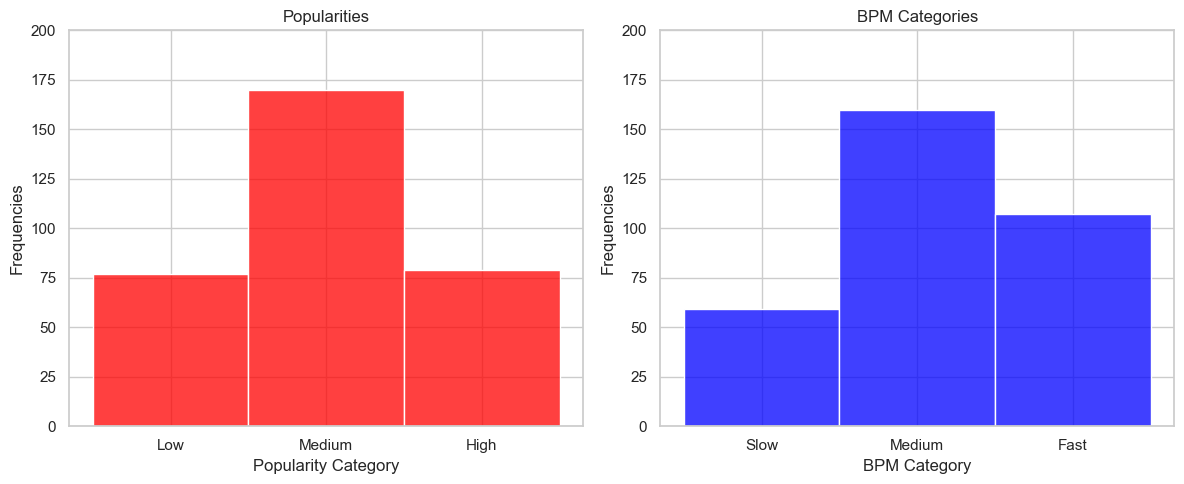

In [13]:
#2pts
# Define the desired order of categories
popularity_order = ['Low', 'Medium', 'High']
bpm_order = ['Slow', 'Medium', 'Fast']

# Convert the categorical variables to ordered categorical types
df['Popularity_Category'] = pd.Categorical(df['Popularity_Category'], categories=popularity_order, ordered=True)
df['BPM_Category'] = pd.Categorical(df['BPM_Category'], categories=bpm_order, ordered=True)

# Set the style for Seaborn
sns.set(style="whitegrid")

# Create a subplot matrix with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for 'Popularity_Category'
sns.histplot(df['Popularity_Category'], bins=30, color='red', ax=axs[0], kde=False)
axs[0].set_title('Popularities')
axs[0].set_ylabel('Frequencies')
axs[0].set_xlabel('Popularity Category')
axs[0].set_ylim(0, 200)

# Histogram for 'BPM_Category'
sns.histplot(df['BPM_Category'], bins=30, color='blue', ax=axs[1], kde=False)
axs[1].set_title('BPM Categories')
axs[1].set_ylabel('Frequencies')
axs[1].set_xlabel('BPM Category')
axs[1].set_ylim(0, 200)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()




Now let's do some bi-variate analysis. If we want to plot the relationship between Energy and Loudness, think that which plot would be the appropriate choice.

Visualize the relationship between the two according to the plot you choose. Loudness bounds must be -20 and -2 and energy limits must be 0-100. 

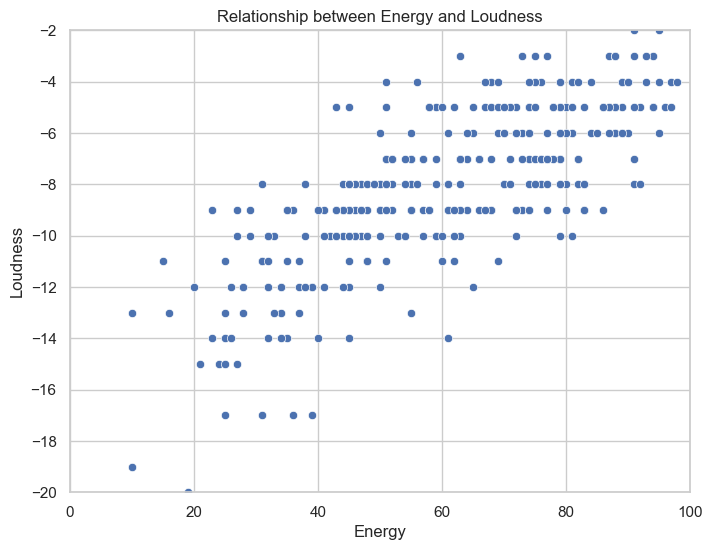

In [14]:
#3pts
# Filter the dataset within specified Loudness and Energy bounds
filtered_data = df[(df['Loud'] >= -20) & (df['Loud'] <= -2) & (df['Energy'] >= 0) & (df['Energy'] <= 100)]

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Energy', y='Loud', data=filtered_data)
plt.title('Relationship between Energy and Loudness')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.xlim(0, 100)  # Set Energy limits
plt.ylim(-20, -2)  # Set Loudness bounds
plt.grid(True)
plt.show()


Now, create the plot which displays the average popularity of music albums over the years, with each data point representing a year, you can use a line graph with markers, and includes labels and appropriate y-limits ( It must be 5 units below the minimum popularity and 5 units above the maximum popularity.)  You can also rotate the x tick values ​​by 45 degrees. 


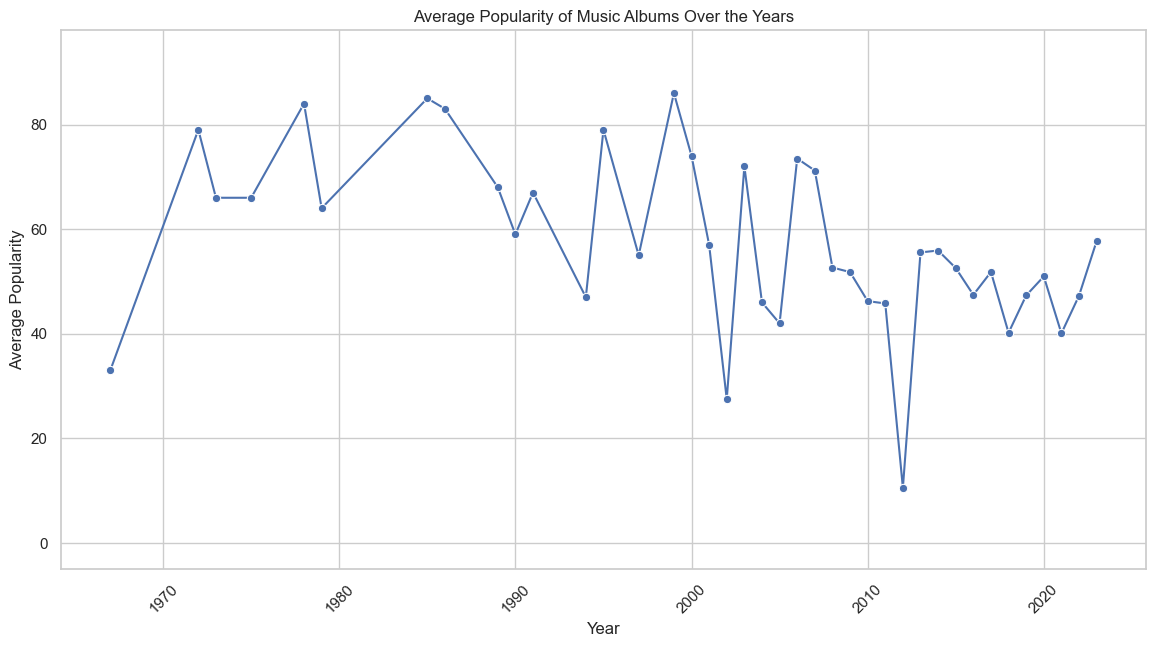

In [15]:
#6pts
# Convert 'Album Date' to datetime
df['Album Date'] = pd.to_datetime(df['Album Date'], errors='coerce')

# Extract the year from 'Album Date'
df['Year'] = df['Album Date'].dt.year

# Calculate the average popularity for each year
average_popularity_by_year = df.groupby('Year')['Popularity'].mean()

# Set the style for Seaborn
sns.set(style="whitegrid")

# Line plot with markers for average popularity over the years
plt.figure(figsize=(14, 7))
sns.lineplot(x=average_popularity_by_year.index, y=average_popularity_by_year.values, marker='o')

# Set plot labels and title
plt.title('Average Popularity of Music Albums Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Popularity')

# Set y-limits
plt.ylim(df['Popularity'].min() - 5, df['Popularity'].max() + 5)

# Rotate x-tick labels
plt.xticks(rotation=45)

# Show the plot
plt.show()


Now, let's create a plot that illustrates the average popularity of music albums across the months of the year. The plot should be in the form of a line graph with markers, with the x-axis representing the months (in a custom order from January to December) and the y-axis representing the average popularity. Make sure to include appropriate labels and set the y-axis limits to be 5 units below the minimum popularity and 5 units above the maximum popularity. Additionally, rotate the x-axis tick values by 45 degrees for better readability. 

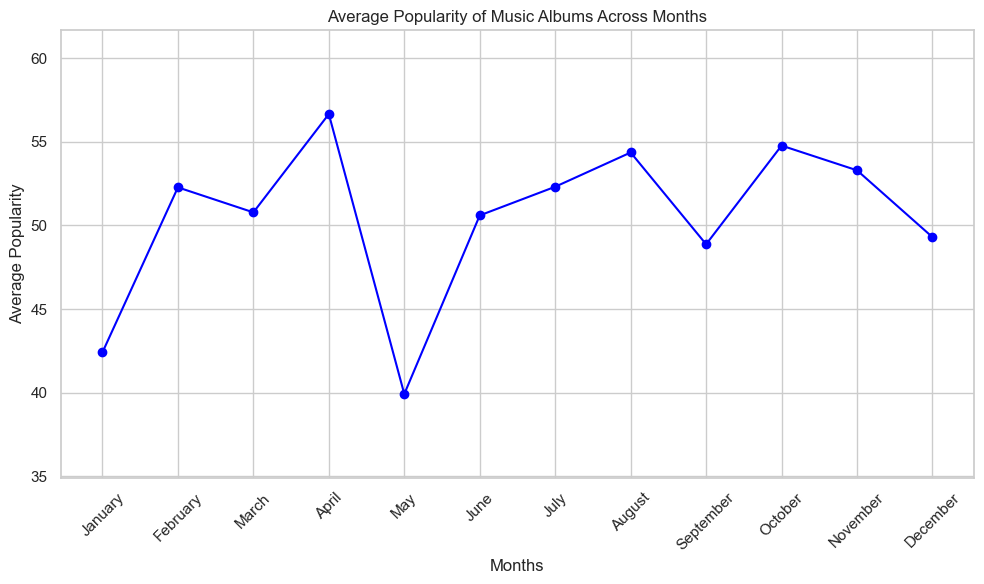

In [16]:
#7pts

# Extracting month from the 'Date' column
df['Month'] = df['Album Date'].dt.strftime('%B')

# Grouping by month and calculating average popularity
avg_popularity_by_month = df.groupby('Month')['Popularity'].mean()

# Define the custom order of months
custom_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Sorting the data by the custom order of months
avg_popularity_by_month = avg_popularity_by_month.reindex(custom_order)

# Plotting the data
plt.figure(figsize=(10, 6))

plt.plot(avg_popularity_by_month.index, avg_popularity_by_month.values, marker='o', linestyle='-', color='blue')

plt.xlabel('Months')
plt.ylabel('Average Popularity')
plt.title('Average Popularity of Music Albums Across Months')

plt.ylim(avg_popularity_by_month.min() - 5, avg_popularity_by_month.max() + 5)
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


Let's create more sophisticated plot. In this question you will also make some operations on the dataset again.

Visualize and compare the BPM (Beats Per Minute) levels in the music of four different artists: Lorde, Big Thief, Wolf Alice and Phoebe Bridgers. The data is presented in a countplot with three categories for BPM levels: Slow, Medium, and Fast. Each artist's contribution to each BPM category is shown using a different color. The y-axis represents the frequency of songs falling into each BPM category. Set the y-axis limits to a range of 0 to 10 for better clarity.

You already see the answer below as an example, you can use inferno as the color code. There may be slight differences in styling, but we expect a very similar answer. Please be careful with the order of x-axis.


<img src="https://i.imgur.com/EAk2mcB.png" alt="barplot-210" border="0" width="500">


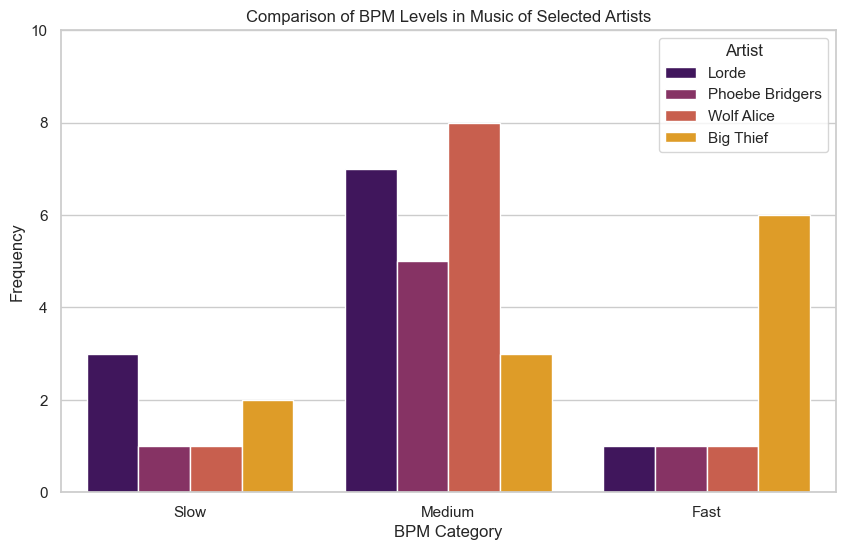

In [17]:
#7pts

# Filter the data for the specified artists
selected_artists = ['Lorde', 'Big Thief', 'Wolf Alice', 'Phoebe Bridgers']
filtered_df = df[df['Artist'].isin(selected_artists)]

# Set the style for Seaborn
sns.set(style="whitegrid")

# Define the order of BPM categories
bpm_order = ['Slow', 'Medium', 'Fast']

# Create a countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='BPM_Category', hue='Artist', data=filtered_df, order=bpm_order, palette='inferno')

# Set plot labels and title
plt.title('Comparison of BPM Levels in Music of Selected Artists')
plt.xlabel('BPM Category')
plt.ylabel('Frequency')

# Set y-axis limits for better clarity
plt.ylim(0, 10)

# Show the plot
plt.show()

We are approaching the end. Visualize the aggregated Energy and Acoustic values of songs categorized by the top 10 most common genres in the dataset.

The final visualization should be a stacked bar chart where each bar represents one of the top 10 genres, and the height of the colored segments within each bar denotes the sum of Energy and Acoustic values for songs in that genre. This allows for a quick comparative view of how energetic or acoustic songs from each of the top genres tend to be.

You already see the answer below as an example, you can use ['#669bbc', '#003049'] colors. There may be slight differences in styling, but we expect a very similar answer.


<img src="https://i.imgur.com/eM0q688.png" alt="barplot-210" border="0" width="500">


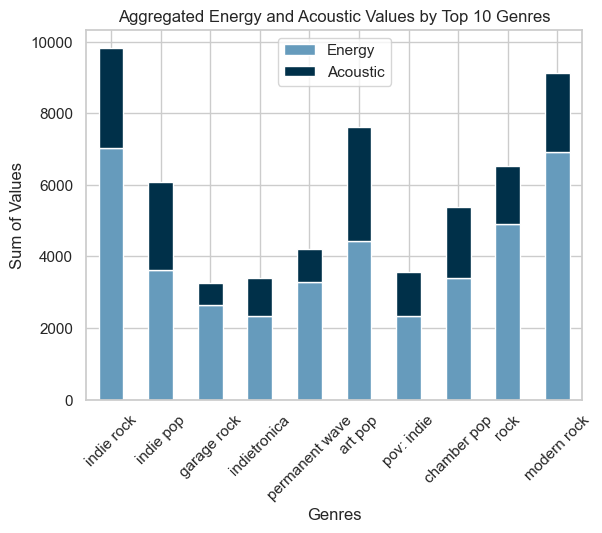

In [18]:
#7pts
# Split 'Genres' and explode to separate rows
df['Genres'] = df['Genres'].str.split(', ')
df_exploded = df.explode('Genres')

# Group by 'Genres' and sum 'Energy' and 'Acoustic' values
genre_aggregates = df_exploded.groupby('Genres')[['Energy', 'Acoustic']].sum()

# Identify the top 10 genres by aggregate 'Energy' and 'Acoustic'
top_genres = genre_aggregates.sum(axis=1).nlargest(10).index.tolist()  # Convert Index to a list

# Shuffle the order of top genres randomly
np.random.shuffle(top_genres)

# Filter for top 10 genres in the shuffled order
top_genre_aggregates = genre_aggregates.loc[top_genres]

# Create the stacked bar chart
top_genre_aggregates.plot(kind='bar', stacked=True, color=['#669bbc', '#003049'])

# Customizing the plot
plt.xlabel('Genres')
plt.ylabel('Sum of Values')
plt.title('Aggregated Energy and Acoustic Values by Top 10 Genres')
plt.xticks(rotation=45)  # Rotating the x-tick labels for better readability
plt.show()


Now, show the correlations of numerical columns in a heatmap, don't forget that you must only use numerical columns. You can use inferno as a color map.

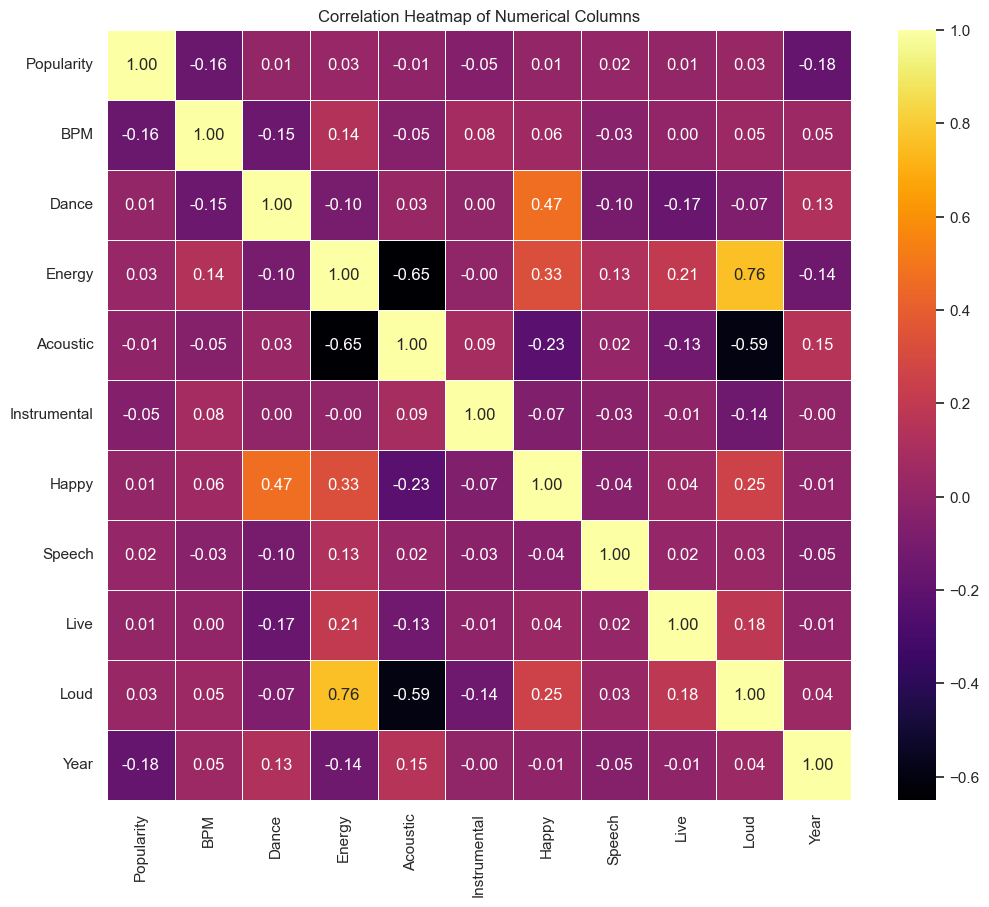

In [19]:
#4pts

# Drop the 'Genres' column before selecting numeric columns
numeric_columns = df.drop('Genres', axis=1).select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Set the style for Seaborn
sns.set(style="white")

# Create a heatmap using the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="inferno", annot=True, fmt=".2f", linewidths=.5)

# Set plot title
plt.title("Correlation Heatmap of Numerical Columns")

# Show the plot
plt.show()


And we will conclude the assignment with a simple question. Though this question isn't directly related to visualization, you must retrieve and print the HTML content of the chat URL you used in ChatGPT using BeautifulSoup. 

In [20]:
#4pts
url = ''

# Fetch the HTML content from the URL
response = requests.get(url)
html_content = response.text

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Print the HTML content
print(soup.prettify())


<html>
 <head>
  <style global="">
   body{font-family:Arial,Helvetica,sans-serif}.container{align-items:center;display:flex;flex-direction:column;gap:2rem;height:100%;justify-content:center;width:100%}@keyframes enlarge-appear{0%{opacity:0;transform:scale(75%) rotate(-90deg)}to{opacity:1;transform:scale(100%) rotate(0deg)}}.logo{color:#8e8ea0}.scale-appear{animation:enlarge-appear .4s ease-out}@media (min-width:768px){.scale-appear{height:48px;width:48px}}.data:empty{display:none}.data{border-radius:5px;color:#8e8ea0;text-align:center}@media (prefers-color-scheme:dark){body{background-color:#343541}.logo{color:#acacbe}}
  </style>
  <meta content="375" http-equiv="refresh"/>
 </head>
 <body>
  <div class="container">
   <div class="logo">
    <svg class="scale-appear" fill="none" height="41" strokewidth="2" viewbox="0 0 41 41" width="41" xmlns="http://www.w3.org/2000/svg">
     <path d="M37.5324 16.8707C37.9808 15.5241 38.1363 14.0974 37.9886 12.6859C37.8409 11.2744 37.3934 9.91076 36

Congratulations! You've reached the end of your assignment. In this assignment, we dealt with data questions about albums, artists, and many music related data over Spotify data. I hope it has been a fun process.

**If you want to listen to the playlist we analyzed:**
https://open.spotify.com/playlist/4wyQnWDDys6T8A2ni96VfG?si=1c69c078d81f47f5

See you later!
    
<img src="https://i.imgur.com/KSbQFe7.png" alt="barplot-210" border="0" width="300">

***dall-e prompt***: an oil painting of data science student does homework in pain

